### <font color = 'red'> Exemplar Sampling

#### 1.2 Import Libraries

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [9]:
epa_data = pd.read_csv('c4_epa_air_quality.csv',index_col = 0)

In [11]:
epa_data.head(10)

,date_local,state_name,county_name,city_name,local_site_name,parameter_name,units_of_measure,arithmetic_mean,aqi
0,2018-01-01,Arizona,Maricopa,Buckeye,BUCKEYE,Carbon monoxide,Parts per million,0.473684,7
1,2018-01-01,Ohio,Belmont,Shadyside,Shadyside,Carbon monoxide,Parts per million,0.263158,5
2,2018-01-01,Wyoming,Teton,Not in a city,Yellowstone National Park - Old Faithful Snow ...,Carbon monoxide,Parts per million,0.111111,2
3,2018-01-01,Pennsylvania,Philadelphia,Philadelphia,North East Waste (NEW),Carbon monoxide,Parts per million,0.300000,3
4,2018-01-01,Iowa,Polk,Des Moines,CARPENTER,Carbon monoxide,Parts per million,0.215789,3
5,2018-01-01,Hawaii,Honolulu,Not in a city,Kapolei,Carbon monoxide,Parts per million,0.994737,14
6,2018-01-01,Hawaii,Honolulu,Not in a city,Kapolei,Carbon monoxide,Parts per million,0.200000,2
7,2018-01-01,Pennsylvania,Erie,Erie,NaN,Carbon monoxide,Parts per million,0.200000,2
8,2018-01-01,Hawaii,Honolulu,Honolulu,Honolulu,Carbon monoxide,Parts per million,0.400000,5
9,2018-01-01,Colorado,Larimer,Fort Collins,Fort Collins - CSU - S. Mason,Carbon monoxide,Parts per million,0.300000,6


#### 1.3. Explore the dataset

In [16]:
epa_data.describe(include = 'all')

,date_local,state_name,county_name,city_name,local_site_name,parameter_name,units_of_measure,arithmetic_mean,aqi
count,260,260,260,260,257,260,260,260.000000,260.000000
unique,1,52,149,190,253,1,1,NaN,NaN
top,2018-01-01,California,Los Angeles,Not in a city,Kapolei,Carbon monoxide,Parts per million,NaN,NaN
freq,260,66,14,21,2,260,260,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.403169,6.757692
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.317902,7.061707
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.200000,2.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.276315,5.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.516009,9.000000


In [18]:
aqi_mean = epa_data['aqi'].mean()
aqi_mean

6.757692307692308

#### 1.4 Statistical Tests

In [47]:
sampled_data = epa_data.sample( n = 50 , replace = True , random_state = 42)

In [49]:
sampled_data.head(10)

,date_local,state_name,county_name,city_name,local_site_name,parameter_name,units_of_measure,arithmetic_mean,aqi
102,2018-01-01,Texas,Harris,Houston,Clinton,Carbon monoxide,Parts per million,0.157895,2
106,2018-01-01,California,Imperial,Calexico,Calexico-Ethel Street,Carbon monoxide,Parts per million,1.183333,26
71,2018-01-01,Alabama,Jefferson,Birmingham,Arkadelphia/Near Road,Carbon monoxide,Parts per million,0.200000,2
188,2018-01-01,Arizona,Maricopa,Tempe,Diablo,Carbon monoxide,Parts per million,0.542105,10
20,2018-01-01,Virginia,Roanoke,Vinton,East Vinton Elementary School,Carbon monoxide,Parts per million,0.100000,1
102,2018-01-01,Texas,Harris,Houston,Clinton,Carbon monoxide,Parts per million,0.157895,2
121,2018-01-01,North Carolina,Mecklenburg,Charlotte,Garinger High School,Carbon monoxide,Parts per million,0.200000,2
214,2018-01-01,Florida,Broward,Davie,Daniela Banu NCORE,Carbon monoxide,Parts per million,0.273684,5
87,2018-01-01,California,Humboldt,Eureka,Jacobs,Carbon monoxide,Parts per million,0.393750,5
99,2018-01-01,California,Santa Barbara,Goleta,Goleta,Carbon monoxide,Parts per million,0.222222,3


In [51]:
sampled_mean = sampled_data['aqi'].mean()
sampled_mean

5.54

In [59]:
estimate_list = []
for i in range(10000):
    estimate_list.append(epa_data['aqi'].sample( n = 50, replace = True).mean())

In [61]:
estimate_df = pd.DataFrame(data = {'estimate' : estimate_list})
estimate_df.head()

,estimate
0,5.72
1,5.02
2,7.50
3,7.34
4,6.70


In [63]:
mean_samples = estimate_df['estimate'].mean()
mean_samples

6.76207

(array([4.200e+01, 6.600e+02, 2.343e+03, 3.298e+03, 2.350e+03, 9.650e+02,
        2.810e+02, 4.900e+01, 1.000e+01, 2.000e+00]),
 array([ 3.7 ,  4.54,  5.38,  6.22,  7.06,  7.9 ,  8.74,  9.58, 10.42,
        11.26, 12.1 ]),
 <BarContainer object of 10 artists>)

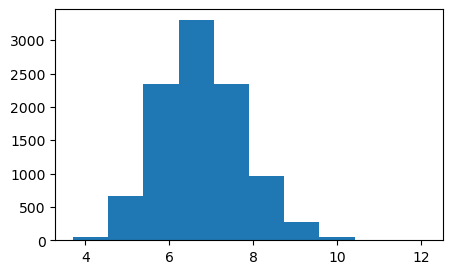

In [73]:
plt.figure(figsize = (5,3))
plt.hist(estimate_df['estimate'])

In [83]:
standard_error = sampled_data['aqi'].std() / np.sqrt(len(sampled_data))
standard_error

0.7413225908290327

#### 1.5 Results and Evaluation

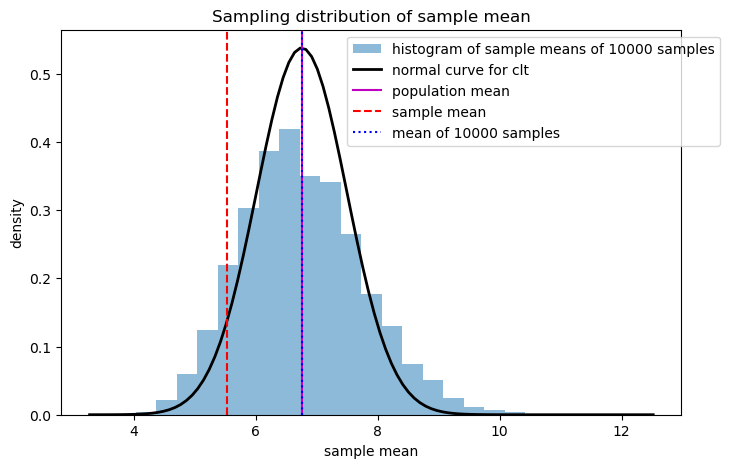

In [110]:
plt.figure(figsize=(8,5))
plt.hist(estimate_df['estimate'], bins = 25, density = True, alpha = 0.5,label = 'histogram of sample means of 10000 samples')
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x , aqi_mean, standard_error)
plt.plot(x , p, 'k', linewidth = 2, label = 'normal curve for clt')
plt.axvline(x=aqi_mean,color='m',linestyle='solid',label='population mean')
plt.axvline(x=sampled_mean,color='r',linestyle='--',label='sample mean')
plt.axvline(x=mean_samples,color='b',linestyle=':',label='mean of 10000 samples')
plt.title('Sampling distribution of sample mean')
plt.xlabel('sample mean')
plt.ylabel('density')
plt.legend(bbox_to_anchor=(0.45,1))